Retrieving the top 10 highest grossing movies with their total gross and visualise it using bar graph and pie chart.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import requests

In [2]:
url = 'https://www.boxofficemojo.com/alltime/world/'
html = requests.get(url)
print(html)

<Response [200]>


In [3]:
#Printing the first 1000 characters, shows the usage of prettify method.
page = bs(html.text,'html.parser')
res = page.prettify()
print(res[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="en">
 <head>
  <title>
   All Time Worldwide Box Office Grosses
  </title>
  <meta content="worldwide" name="all time box office"/>
  <meta content="world, worldwide, wide, box, office, foriegn, overseas, domestic, all, time, report, movie, film" name="keywords"/>
  <meta content="Chart of all time worldwide box office grosses, combining domestic and foreign grosses." name="description"/>
  <link charset="utf-8" href="/css/mojo.css?1" media="screen" rel="stylesheet" title="no title" type="text/css"/>
  <link charset="utf-8" href="/css/mojo.css?1" media="print" rel="stylesheet" title="no title" type="text/css"/>
 </head>
 <body>
  <iframe frameborder="0" height="1" id="sis_pixel_sitewide" marginheight="0" marginwidth="0" style="display: none;" width="1">
  </iframe>
  <script>
   setTimeout(function(){
        try{
            //sis3.0 pixel
            var cacheBust = Math

In [4]:
#Finding the top 10 movies of all time
page.findAll('b')

[<b>WORLDWIDE GROSSES</b>,
 <b><font size="5">#1-100</font> - <a href="/alltime/world/?pagenum=2&amp;p=.htm">#101-200</a> - <a href="/alltime/world/?pagenum=3&amp;p=.htm">#201-300</a> - <a href="/alltime/world/?pagenum=4&amp;p=.htm">#301-400</a> - <a href="/alltime/world/?pagenum=5&amp;p=.htm">#401-500</a> - <a href="/alltime/world/?pagenum=6&amp;p=.htm">#501-600</a> - <a href="/alltime/world/?pagenum=7&amp;p=.htm">#601-700</a> - <a href="/alltime/world/?pagenum=8&amp;p=.htm">#701-785</a></b>,
 <b>Worldwide</b>,
 <b>Avengers: Endgame</b>,
 <b>$2,793.9</b>,
 <b>Avatar</b>,
 <b>$2,789.7</b>,
 <b>Titanic</b>,
 <b>$2,187.5</b>,
 <b>Star Wars: The Force Awakens</b>,
 <b>$2,068.2</b>,
 <b>Avengers: Infinity War</b>,
 <b>$2,048.4</b>,
 <b>Jurassic World</b>,
 <b>$1,671.7</b>,
 <b>Marvel's The Avengers</b>,
 <b>$1,518.8</b>,
 <b>Furious 7</b>,
 <b>$1,516.0</b>,
 <b>Avengers: Age of Ultron</b>,
 <b>$1,405.4</b>,
 <b>Black Panther</b>,
 <b>$1,346.9</b>,
 <b>Harry Potter and the Deathly Hallows P

In [5]:
data = page.findAll('b')[3:23]
print(data)

[<b>Avengers: Endgame</b>, <b>$2,793.9</b>, <b>Avatar</b>, <b>$2,789.7</b>, <b>Titanic</b>, <b>$2,187.5</b>, <b>Star Wars: The Force Awakens</b>, <b>$2,068.2</b>, <b>Avengers: Infinity War</b>, <b>$2,048.4</b>, <b>Jurassic World</b>, <b>$1,671.7</b>, <b>Marvel's The Avengers</b>, <b>$1,518.8</b>, <b>Furious 7</b>, <b>$1,516.0</b>, <b>Avengers: Age of Ultron</b>, <b>$1,405.4</b>, <b>Black Panther</b>, <b>$1,346.9</b>]


In [6]:
"""
- The top 10 movies along with their global gross is retrieved.
- Mapping each gross with its respective movie.
- Before that removing the bold tags.
"""

#Analysing
movies = []
gross = []
for item in data[::2]:
    movies.append(str(item).replace("</b>","").replace("<b>",""))
for item in data[1::2]:
    gross.append(float(str(item).replace("</b>","").replace("<b>","").replace("$","").replace(",","")))

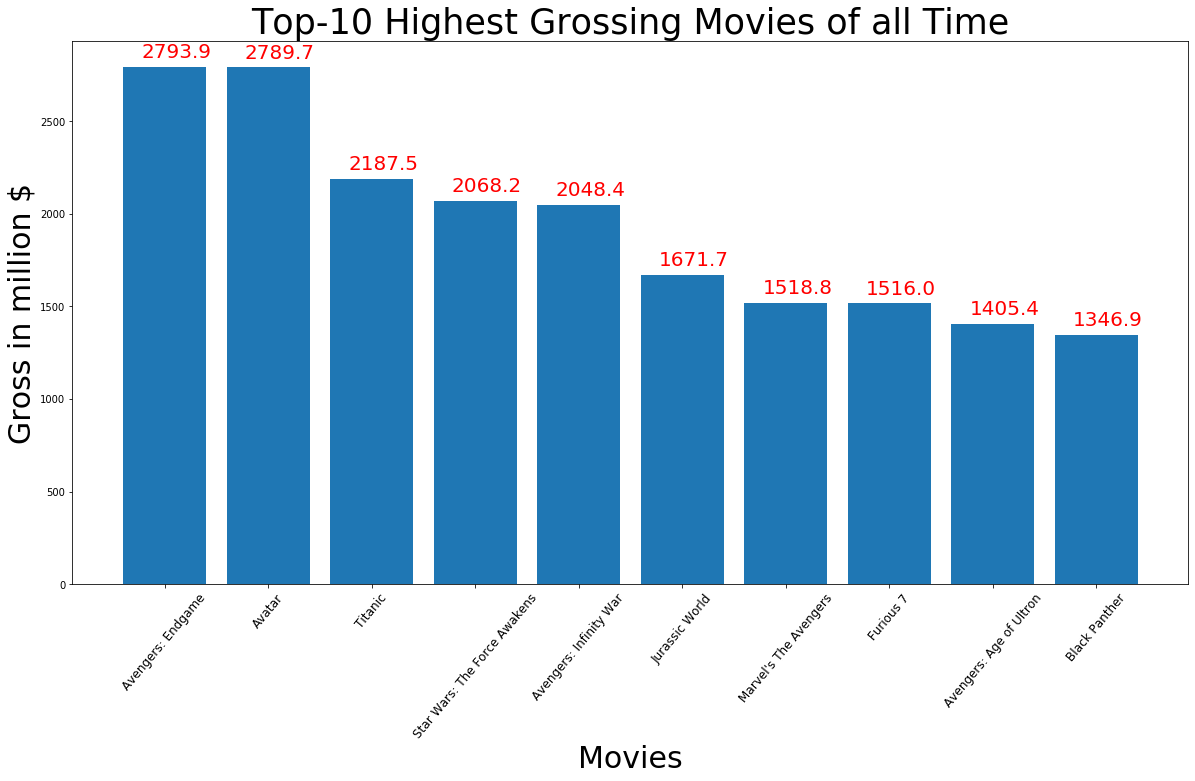

In [7]:
#Visualising

index = np.arange(len(movies))
plt.figure(figsize=(20,10))
plt.bar(index,gross)
plt.xlabel('Movies', fontsize=30)
plt.ylabel('Gross in million $', fontsize=30)
plt.xticks(index, movies, fontsize=12, rotation=50)
for i, v in enumerate(gross):
    plt.text(i - 0.225, v + 50 , str(v), color='red',size = 20)
plt.title('Top-10 Highest Grossing Movies of all Time',fontsize = 35)
plt.show()

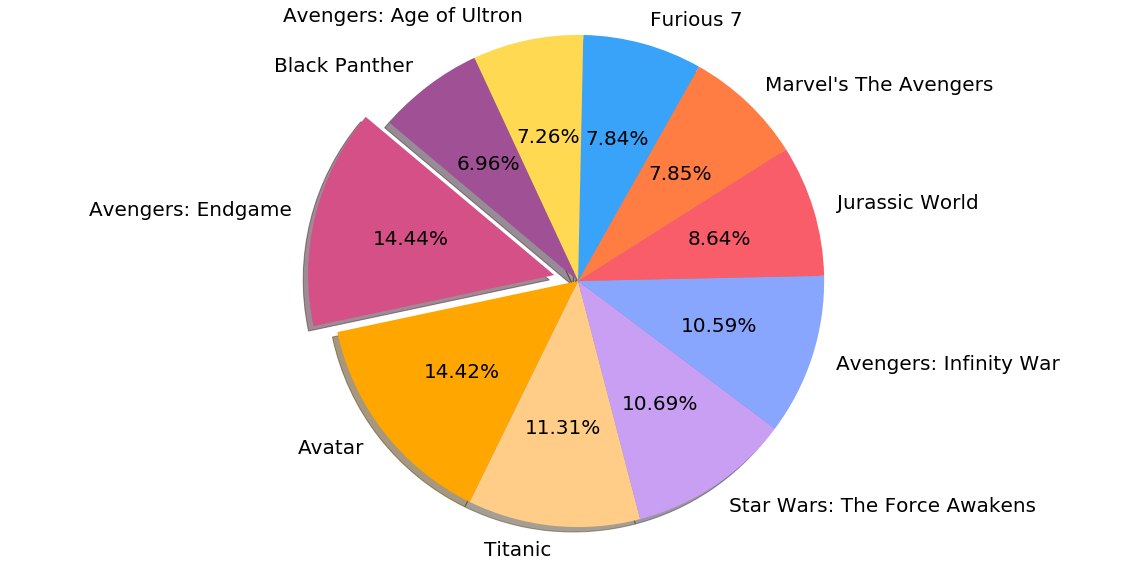

In [8]:
colors = ['#d45087','#ffa600','#ffcd87','#c99ff3','#89a6fe','#f95d6a','#ff7c43','#39a3fa','#ffd952','#a05195']
e = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  
plt.rcParams['font.size'] = 20
plt.figure(figsize=(20,10))
plt.pie(gross,explode = e, labels=movies, colors=colors,autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()